In [30]:
import pandas as pd
import numpy as np

In [31]:
form1_file_path = './tbimsform1.csv'
form1_data = pd.read_csv(form1_file_path)
form1_data.describe()

,Unnamed: 0,Version,DataFrom,DataMethod,Sex,Race,Ethnicity,RaceWht,RaceAsn,RaceInd,...,cntLOCSameIndex,cntLOCBefore15yr,YoungestAgeLOC,cntModSevInjuries,cntModSevBeforeIndex,cntModSevAfterIndex,cntModSevSameIndex,cntModSevBefore15yr,RURALadm,RURALdc
count,16134.000000,16134.000000,757.000000,757.000000,16128.000000,16126.000000,11419.000000,11411.000000,11350.000000,11347.000000,...,12413.000000,12413.000000,1754.000000,12414.000000,12413.000000,12413.000000,12413.000000,12413.000000,13788.000000,13742.000000
mean,8067.500000,10.192829,5.825627,6.143989,1.735739,1.752201,1.232245,1.838577,1.153568,1.159690,...,0.007250,0.048900,25.046750,0.045271,0.031016,0.011440,0.001289,0.008781,2.013780,2.039951
std,4657.628957,5.069536,20.789223,19.918462,0.444873,1.383127,0.909270,0.921011,0.934800,0.945018,...,0.089466,0.258487,17.030327,0.249798,0.207237,0.115777,0.035881,0.099969,0.749332,0.747169
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4034.250000,9.100000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,8067.500000,11.300000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,12100.750000,14.100000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,32.750000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
max,16134.000000,16.100000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,2.000000,6.000000,95.000000,7.000000,6.000000,3.000000,1.000000,3.000000,3.000000,3.000000


In [32]:
form1_data.columns

Index(['Unnamed: 0', 'UID', 'Version', 'DataFrom', 'DataMethod', 'Sex', 'Race',
       'Ethnicity', 'RaceWht', 'RaceAsn',
       ...
       'cntLOCSameIndex', 'cntLOCBefore15yr', 'YoungestAgeLOC',
       'cntModSevInjuries', 'cntModSevBeforeIndex', 'cntModSevAfterIndex',
       'cntModSevSameIndex', 'cntModSevBefore15yr', 'RURALadm', 'RURALdc'],
      dtype='object', length=266)

In [33]:
form_data = form1_data[pd.notnull(form1_data['CTFrag'])]
form_data = form_data[pd.notnull(form_data['CTPunctate'])]
form_data = form_data[pd.notnull(form_data['SCI'])]
final = form_data[pd.notnull(form_data['CT7c1AxialLNS'])]
final = final[pd.notnull(final['CT5b3CorticalNTemp'])]
final = final[pd.notnull(final['CT7c1AxialLNS'])]
final = final[pd.notnull(final['CT5b1CorticalLTemp'])]



In [34]:
features = ['DAYStoREHABadm', 'CTIntracrain', 'CTPunctate', 'CTSubarachnioid', 'CTIntraventricular', 'CT5a1CorticalLFront', 'CT5a2CorticalRFront', 'CT5a3CorticalNFront', 'CT5b1CorticalLTemp', 'CT5b2CorticalRTemp', 'CT5b3CorticalNTemp', 'CT5c1CorticalLPar', 'CT5c2CorticalRPar', 'CT5c3CorticalNPar', 'CT5d1CorticalLOcc', 'CT5d2CorticalROcc', 'CT5d3CorticalNOcc', 'CT5e1CorticalLUnk', 'CT5e2CorticalRUnk', 'CT5e3CorticalNUnk', 'CT6aNonCortL', 'CT6aNonCortR', 'CT6aNonCortN', 'CT7a1AxialLEpi', 'CT7a2AxialREpi', 'CT7a3AxialNEpi', 'CT7b1AxialLSub', 'CT7b2AxialRSub', 'CT7b3AxialNSub', 'CT7c1AxialLNS', 'CT7c2AxialRNS', 'CT7c3AxialNNS', 'CT7d1FalcineSub', 'CT7d2FalcineSAH', 'CT7d3FalcineUnk', 'CTFrag', 'SCI']
# add more continuous features? Add CT score thing as a Binary variable?
for variable in features:
    final = final[pd.notnull(final[variable])]
X = final[features]
y = X.DAYStoREHABadm # we now have consistent filtering!
needLater = X.DAYStoREHABadm
X = X.drop(columns="DAYStoREHABadm")



In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['DAYStoREHABadm', 'CTIntracrain', 'CTPunctate', 'CTSubarachnioid', 'CTIntraventricular', 'CT5a1CorticalLFront', 'CT5a2CorticalRFront', 'CT5a3CorticalNFront', 'CT5b1CorticalLTemp', 'CT5b2CorticalRTemp', 'CT5b3CorticalNTemp', 'CT5c1CorticalLPar', 'CT5c2CorticalRPar', 'CT5c3CorticalNPar', 'CT5d1CorticalLOcc', 'CT5d2CorticalROcc', 'CT5d3CorticalNOcc', 'CT5e1CorticalLUnk', 'CT5e2CorticalRUnk', 'CT5e3CorticalNUnk', 'CT6aNonCortL', 'CT6aNonCortR', 'CT6aNonCortN', 'CT7a1AxialLEpi', 'CT7a2AxialREpi', 'CT7a3AxialNEpi', 'CT7b1AxialLSub', 'CT7b2AxialRSub', 'CT7b3AxialNSub', 'CT7c1AxialLNS', 'CT7c2AxialRNS', 'CT7c3AxialNNS', 'CT7d1FalcineSub', 'CT7d2FalcineSAH', 'CT7d3FalcineUnk', 'CTFrag', 'SCI']
for variable in features:
    final = final[pd.notnull(final[variable])]
X = final[features]
y = X.DAYStoREHABadm # we now have consistent filtering!
needLater = X.DAYStoREHABadm
X = X.drop(columns="DAYStoREHABadm")
original = X
minAccuracyScore = 2334
maxEffect = 0
print(len(features))
y = needLater
# converting all DAYStoREHABadm values to 0 if <27 and 1 otherwise
y = pd.cut(y, [-1, 27, 1000], labels=False) + 1


37


In [36]:
# {'CT5a1CorticalLFront': 1, 'CTIntraventricular': 1, 'CT7a3AxialNEpi': 7, 'CTPunctate': 10, 'CT5b3CorticalNTemp': 8,
#  'CT5b2CorticalRTemp': 26,
#  'CT5a3CorticalNFront': 5, 'CT6aNonCortN': 184, 'CT7d3FalcineUnk': 162, 'CT5d1CorticalLOcc': 96}
# {'CT7d3FalcineUnk': 1, 'CT5e2CorticalRUnk': 65, 'CT7c1AxialLNS': 18, 'CT6aNonCortR': 10, 'CT5e3CorticalNUnk': 8,
#  'CTIntraventricular': 168, 'CT7a1AxialLEpi': 60, 'CT7b3AxialNSub': 170}

# we need to clean up the dataset - take away all datapoints that contain even a single 0 in the features that we are looking at
X = X.dropna(axis=0)
X = X.astype('int64')
X.describe()

,CTIntracrain,CTPunctate,CTSubarachnioid,CTIntraventricular,CT5a1CorticalLFront,CT5a2CorticalRFront,CT5a3CorticalNFront,CT5b1CorticalLTemp,CT5b2CorticalRTemp,CT5b3CorticalNTemp,...,CT7b2AxialRSub,CT7b3AxialNSub,CT7c1AxialLNS,CT7c2AxialRNS,CT7c3AxialNNS,CT7d1FalcineSub,CT7d2FalcineSAH,CT7d3FalcineUnk,CTFrag,SCI
count,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,...,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000
mean,2.025980,1.378803,1.770314,1.402842,1.518655,1.510079,1.168086,1.389508,1.379742,1.165081,...,1.455741,1.197696,1.177726,1.180606,1.168712,0.146175,0.120821,0.119006,1.244648,1.058595
std,1.122615,1.244756,1.217125,1.240521,1.245588,1.244279,1.195624,1.240818,1.238495,1.194839,...,1.244991,1.203765,1.197109,1.199082,1.195798,0.545304,0.481344,0.476110,1.267213,0.348967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [37]:
y.describe() # y is the prediction variable

count    15974.000000
mean         1.232628
std          0.422520
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: DAYStoREHABadm, dtype: float64

In [38]:
y = needLater
y = pd.cut(y, [-1, 27, 1000], labels=False) + 1
y.describe()

count    15974.000000
mean         1.232628
std          0.422520
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: DAYStoREHABadm, dtype: float64

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

days_model = LogisticRegression(max_iter=10000, random_state=0)
y_pred = days_model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total of %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy_score(y_test,y_pred)

(12779, 36) (12779,)
(3195, 36) (3195,)


/Users/shashankrammoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of mislabeled points out of a total of 3195 points: 785


0.7543035993740219

In [40]:
# a Naive Bayes classifier, alternative to Logistic regression
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7549295774647887

In [41]:
# not relevant
from sklearn.metrics import mean_absolute_error
predicted_time = days_model.predict(X)
mean_absolute_error(y, predicted_time)

0.23256541880555903


Plan of action:
* One-hot encoding - converts categorical variables to binary variables
* Still need to find a way to deal with ordinal variables
* Missing data can be encoded as a 0 on all the binary variables that result
* Then use argmax
* tfjs seems really cool, maybe consider that?
* treating unknown variables as any other category for now

In [145]:
# now we are looking at non-binary variables, and will eventually combine one-hot encoded 
# categorical variables with binary variables to create one huge feature list

features = ['Craniotomy',
'GCSTot',
'Race',
'Sex',
'AcutePay1',
'DRINKCat',
'Drugs',
'BMICat',
'CTIntracrain', 'CTPunctate', 'CTSubarachnioid', 'CTIntraventricular', 'CT5a1CorticalLFront', 'CT5a2CorticalRFront', 'CT5a3CorticalNFront', 'CT5b1CorticalLTemp', 'CT5b2CorticalRTemp', 'CT5b3CorticalNTemp', 'CT5c1CorticalLPar', 'CT5c2CorticalRPar', 'CT5c3CorticalNPar', 'CT5d1CorticalLOcc', 'CT5d2CorticalROcc', 'CT5d3CorticalNOcc', 'CT5e1CorticalLUnk', 'CT5e2CorticalRUnk', 'CT5e3CorticalNUnk', 'CT6aNonCortL', 'CT6aNonCortR', 'CT6aNonCortN', 'CT7a1AxialLEpi', 'CT7a2AxialREpi', 'CT7a3AxialNEpi', 'CT7b1AxialLSub', 'CT7b2AxialRSub', 'CT7b3AxialNSub', 'CT7c1AxialLNS', 'CT7c2AxialRNS', 'CT7c3AxialNNS', 'CT7d1FalcineSub', 'CT7d2FalcineSAH', 'CT7d3FalcineUnk', 'CTFrag', 'SCI',
'DAYStoREHABadm']
for variable in features:
    final = final[pd.notnull(final[variable])]
X = final[features]
for variable in features[:-1]:
    m = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, m], axis=1)
X.head()

,Craniotomy,GCSTot,Race,Sex,AcutePay1,DRINKCat,Drugs,BMICat,CTIntracrain,CTPunctate,...,CT7d3FalcineUnk_8.0,CT7d3FalcineUnk_9.0,CTFrag_0.0,CTFrag_1.0,CTFrag_2.0,CTFrag_8.0,CTFrag_9.0,SCI_1.0,SCI_2.0,SCI_9.0
1,1.0,15.0,1.0,2.0,2.0,3,1.0,4,2.0,1.0,...,0,0,0,1,0,0,0,1,0,0
2,1.0,11.0,1.0,2.0,2.0,1,1.0,9,2.0,2.0,...,0,0,0,1,0,0,0,1,0,0
3,1.0,6.0,2.0,2.0,2.0,3,1.0,9,2.0,1.0,...,0,0,0,1,0,0,0,1,0,0
4,1.0,11.0,2.0,2.0,10.0,3,2.0,9,2.0,1.0,...,0,0,0,1,0,0,0,1,0,0
5,4.0,77.0,1.0,2.0,1.0,2,1.0,9,2.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [146]:
X = X.drop('Sex', axis=1)

In [147]:
for variable in features:
    if variable in X and variable != 'DAYStoREHABadm':
        X = X.drop(variable, axis=1)

In [148]:
X.head()

,DAYStoREHABadm,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,Craniotomy_6.0,Craniotomy_9.0,GCSTot_3.0,GCSTot_4.0,GCSTot_5.0,...,CT7d3FalcineUnk_8.0,CT7d3FalcineUnk_9.0,CTFrag_0.0,CTFrag_1.0,CTFrag_2.0,CTFrag_8.0,CTFrag_9.0,SCI_1.0,SCI_2.0,SCI_9.0
1,12.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,5.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,33.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,25.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [149]:
X.describe()

,DAYStoREHABadm,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,Craniotomy_6.0,Craniotomy_9.0,GCSTot_3.0,GCSTot_4.0,GCSTot_5.0,...,CT7d3FalcineUnk_8.0,CT7d3FalcineUnk_9.0,CTFrag_0.0,CTFrag_1.0,CTFrag_2.0,CTFrag_8.0,CTFrag_9.0,SCI_1.0,SCI_2.0,SCI_9.0
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,20.528742,0.605320,0.115954,0.074933,0.018898,0.182459,0.002436,0.049187,0.012050,0.013103,...,0.000593,0.000922,0.019227,0.893988,0.064265,0.010009,0.012511,0.949694,0.049253,0.001054
std,17.402461,0.488798,0.320181,0.263291,0.136168,0.386235,0.049300,0.216265,0.109112,0.113721,...,0.024337,0.030349,0.137326,0.307863,0.245233,0.099544,0.111153,0.218583,0.216402,0.032442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:

dropThese = ['Craniotomy_6.0', 'Craniotomy_9.0', 'BMICat_9',
'GCSTot_77.0',
'GCSTot_88.0',
'Race_7.0',
'Race_9.0',
'Sex_9.0',
'Drugs_7.0',
'Drugs_9.0',
'AcutePay1_99.0']
newCols = X.drop(dropThese, axis=1)


In [151]:
newCols.describe()

,DAYStoREHABadm,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,GCSTot_3.0,GCSTot_4.0,GCSTot_5.0,GCSTot_6.0,GCSTot_7.0,...,CT7d3FalcineUnk_8.0,CT7d3FalcineUnk_9.0,CTFrag_0.0,CTFrag_1.0,CTFrag_2.0,CTFrag_8.0,CTFrag_9.0,SCI_1.0,SCI_2.0,SCI_9.0
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,20.528742,0.605320,0.115954,0.074933,0.018898,0.049187,0.012050,0.013103,0.031079,0.035557,...,0.000593,0.000922,0.019227,0.893988,0.064265,0.010009,0.012511,0.949694,0.049253,0.001054
std,17.402461,0.488798,0.320181,0.263291,0.136168,0.216265,0.109112,0.113721,0.173538,0.185188,...,0.024337,0.030349,0.137326,0.307863,0.245233,0.099544,0.111153,0.218583,0.216402,0.032442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
newCols = newCols.drop(['AcutePay1_55.0','AcutePay1_77.0','DRINKCat_9'], axis=1)
list(newCols)

['DAYStoREHABadm',
 'Craniotomy_1.0',
 'Craniotomy_2.0',
 'Craniotomy_3.0',
 'Craniotomy_4.0',
 'GCSTot_3.0',
 'GCSTot_4.0',
 'GCSTot_5.0',
 'GCSTot_6.0',
 'GCSTot_7.0',
 'GCSTot_8.0',
 'GCSTot_9.0',
 'GCSTot_10.0',
 'GCSTot_11.0',
 'GCSTot_12.0',
 'GCSTot_13.0',
 'GCSTot_14.0',
 'GCSTot_15.0',
 'GCSTot_99.0',
 'Race_1.0',
 'Race_2.0',
 'Race_3.0',
 'Race_4.0',
 'Race_5.0',
 'Sex_1.0',
 'Sex_2.0',
 'AcutePay1_1.0',
 'AcutePay1_2.0',
 'AcutePay1_3.0',
 'AcutePay1_4.0',
 'AcutePay1_7.0',
 'AcutePay1_8.0',
 'AcutePay1_10.0',
 'AcutePay1_14.0',
 'AcutePay1_88.0',
 'DRINKCat_0',
 'DRINKCat_1',
 'DRINKCat_2',
 'DRINKCat_3',
 'Drugs_0.0',
 'Drugs_1.0',
 'Drugs_2.0',
 'BMICat_1',
 'BMICat_2',
 'BMICat_3',
 'BMICat_4',
 'BMICat_5',
 'BMICat_6',
 'BMICat_7',
 'BMICat_8',
 'CTIntracrain_0.0',
 'CTIntracrain_1.0',
 'CTIntracrain_2.0',
 'CTIntracrain_8.0',
 'CTIntracrain_9.0',
 'CTPunctate_0.0',
 'CTPunctate_1.0',
 'CTPunctate_2.0',
 'CTPunctate_8.0',
 'CTPunctate_9.0',
 'CTSubarachnioid_0.0',
 'CT

In [153]:
# No CT Done shouldn't be a factor - so get rid of indicator for that. 
#If a patient hasn't had a CT Scan - they'll just show up as 0 on everything CT-related. Might have to check this.
ctvars = ['CTIntracrain_0.0',
 'CTIntracrain_1.0',
 'CTIntracrain_2.0',
 'CTIntracrain_8.0',
 'CTIntracrain_9.0',
 'CTPunctate_0.0',
 'CTPunctate_1.0',
 'CTPunctate_2.0',
 'CTPunctate_8.0',
 'CTPunctate_9.0',
 'CTSubarachnioid_0.0',
 'CTSubarachnioid_1.0',
 'CTSubarachnioid_2.0',
 'CTSubarachnioid_8.0',
 'CTSubarachnioid_9.0',
 'CTIntraventricular_0.0',
 'CTIntraventricular_1.0',
 'CTIntraventricular_2.0',
 'CTIntraventricular_8.0',
 'CTIntraventricular_9.0',
 'CT5a1CorticalLFront_0.0',
 'CT5a1CorticalLFront_1.0',
 'CT5a1CorticalLFront_2.0',
 'CT5a1CorticalLFront_8.0',
 'CT5a1CorticalLFront_9.0',
 'CT5a2CorticalRFront_0.0',
 'CT5a2CorticalRFront_1.0',
 'CT5a2CorticalRFront_2.0',
 'CT5a2CorticalRFront_8.0',
 'CT5a2CorticalRFront_9.0',
 'CT5a3CorticalNFront_0.0',
 'CT5a3CorticalNFront_1.0',
 'CT5a3CorticalNFront_2.0',
 'CT5a3CorticalNFront_8.0',
 'CT5a3CorticalNFront_9.0',
 'CT5b1CorticalLTemp_0.0',
 'CT5b1CorticalLTemp_1.0',
 'CT5b1CorticalLTemp_2.0',
 'CT5b1CorticalLTemp_8.0',
 'CT5b1CorticalLTemp_9.0',
 'CT5b2CorticalRTemp_0.0',
 'CT5b2CorticalRTemp_1.0',
 'CT5b2CorticalRTemp_2.0',
 'CT5b2CorticalRTemp_8.0',
 'CT5b2CorticalRTemp_9.0',
 'CT5b3CorticalNTemp_0.0',
 'CT5b3CorticalNTemp_1.0',
 'CT5b3CorticalNTemp_2.0',
 'CT5b3CorticalNTemp_8.0',
 'CT5b3CorticalNTemp_9.0',
 'CT5c1CorticalLPar_0.0',
 'CT5c1CorticalLPar_1.0',
 'CT5c1CorticalLPar_2.0',
 'CT5c1CorticalLPar_8.0',
 'CT5c1CorticalLPar_9.0',
 'CT5c2CorticalRPar_0.0',
 'CT5c2CorticalRPar_1.0',
 'CT5c2CorticalRPar_2.0',
 'CT5c2CorticalRPar_8.0',
 'CT5c2CorticalRPar_9.0',
 'CT5c3CorticalNPar_0.0',
 'CT5c3CorticalNPar_1.0',
 'CT5c3CorticalNPar_2.0',
 'CT5c3CorticalNPar_8.0',
 'CT5c3CorticalNPar_9.0',
 'CT5d1CorticalLOcc_0.0',
 'CT5d1CorticalLOcc_1.0',
 'CT5d1CorticalLOcc_2.0',
 'CT5d1CorticalLOcc_8.0',
 'CT5d1CorticalLOcc_9.0',
 'CT5d2CorticalROcc_0.0',
 'CT5d2CorticalROcc_1.0',
 'CT5d2CorticalROcc_2.0',
 'CT5d2CorticalROcc_8.0',
 'CT5d2CorticalROcc_9.0',
 'CT5d3CorticalNOcc_0.0',
 'CT5d3CorticalNOcc_1.0',
 'CT5d3CorticalNOcc_2.0',
 'CT5d3CorticalNOcc_8.0',
 'CT5d3CorticalNOcc_9.0',
 'CT5e1CorticalLUnk_0.0',
 'CT5e1CorticalLUnk_1.0',
 'CT5e1CorticalLUnk_2.0',
 'CT5e1CorticalLUnk_8.0',
 'CT5e1CorticalLUnk_9.0',
 'CT5e2CorticalRUnk_0.0',
 'CT5e2CorticalRUnk_1.0',
 'CT5e2CorticalRUnk_2.0',
 'CT5e2CorticalRUnk_8.0',
 'CT5e2CorticalRUnk_9.0',
 'CT5e3CorticalNUnk_0.0',
 'CT5e3CorticalNUnk_1.0',
 'CT5e3CorticalNUnk_2.0',
 'CT5e3CorticalNUnk_8.0',
 'CT5e3CorticalNUnk_9.0',
 'CT6aNonCortL_0.0',
 'CT6aNonCortL_1.0',
 'CT6aNonCortL_2.0',
 'CT6aNonCortL_8.0',
 'CT6aNonCortL_9.0',
 'CT6aNonCortR_0.0',
 'CT6aNonCortR_1.0',
 'CT6aNonCortR_2.0',
 'CT6aNonCortR_8.0',
 'CT6aNonCortR_9.0',
 'CT6aNonCortN_0.0',
 'CT6aNonCortN_1.0',
 'CT6aNonCortN_2.0',
 'CT6aNonCortN_8.0',
 'CT6aNonCortN_9.0',
 'CT7a1AxialLEpi_0.0',
 'CT7a1AxialLEpi_1.0',
 'CT7a1AxialLEpi_2.0',
 'CT7a1AxialLEpi_8.0',
 'CT7a1AxialLEpi_9.0',
 'CT7a2AxialREpi_0.0',
 'CT7a2AxialREpi_1.0',
 'CT7a2AxialREpi_2.0',
 'CT7a2AxialREpi_8.0',
 'CT7a2AxialREpi_9.0',
 'CT7a3AxialNEpi_0.0',
 'CT7a3AxialNEpi_1.0',
 'CT7a3AxialNEpi_2.0',
 'CT7a3AxialNEpi_8.0',
 'CT7a3AxialNEpi_9.0',
 'CT7b1AxialLSub_0.0',
 'CT7b1AxialLSub_1.0',
 'CT7b1AxialLSub_2.0',
 'CT7b1AxialLSub_8.0',
 'CT7b1AxialLSub_9.0',
 'CT7b2AxialRSub_0.0',
 'CT7b2AxialRSub_1.0',
 'CT7b2AxialRSub_2.0',
 'CT7b2AxialRSub_8.0',
 'CT7b2AxialRSub_9.0',
 'CT7b3AxialNSub_0.0',
 'CT7b3AxialNSub_1.0',
 'CT7b3AxialNSub_2.0',
 'CT7b3AxialNSub_8.0',
 'CT7b3AxialNSub_9.0',
 'CT7c1AxialLNS_0.0',
 'CT7c1AxialLNS_1.0',
 'CT7c1AxialLNS_2.0',
 'CT7c1AxialLNS_8.0',
 'CT7c1AxialLNS_9.0',
 'CT7c2AxialRNS_0.0',
 'CT7c2AxialRNS_1.0',
 'CT7c2AxialRNS_2.0',
 'CT7c2AxialRNS_8.0',
 'CT7c2AxialRNS_9.0',
 'CT7c3AxialNNS_0.0',
 'CT7c3AxialNNS_1.0',
 'CT7c3AxialNNS_2.0',
 'CT7c3AxialNNS_8.0',
 'CT7c3AxialNNS_9.0',
 'CT7d1FalcineSub_0.0',
 'CT7d1FalcineSub_1.0',
 'CT7d1FalcineSub_2.0',
 'CT7d1FalcineSub_8.0',
 'CT7d1FalcineSub_9.0',
 'CT7d2FalcineSAH_0.0',
 'CT7d2FalcineSAH_1.0',
 'CT7d2FalcineSAH_2.0',
 'CT7d2FalcineSAH_8.0',
 'CT7d2FalcineSAH_9.0',
 'CT7d3FalcineUnk_0.0',
 'CT7d3FalcineUnk_1.0',
 'CT7d3FalcineUnk_2.0',
 'CT7d3FalcineUnk_8.0',
 'CT7d3FalcineUnk_9.0',
 'CTFrag_0.0',
 'CTFrag_8.0',
 'CTFrag_9.0',
         'SCI_9.0', 'Drugs_0.0']

newCTvars = []
for var in ctvars:
    if '0.0' in var or '8.0' in var or '9.0' in var:
                newCTvars.append(var)
                
print(newCTvars)

['CTIntracrain_0.0', 'CTIntracrain_8.0', 'CTIntracrain_9.0', 'CTPunctate_0.0', 'CTPunctate_8.0', 'CTPunctate_9.0', 'CTSubarachnioid_0.0', 'CTSubarachnioid_8.0', 'CTSubarachnioid_9.0', 'CTIntraventricular_0.0', 'CTIntraventricular_8.0', 'CTIntraventricular_9.0', 'CT5a1CorticalLFront_0.0', 'CT5a1CorticalLFront_8.0', 'CT5a1CorticalLFront_9.0', 'CT5a2CorticalRFront_0.0', 'CT5a2CorticalRFront_8.0', 'CT5a2CorticalRFront_9.0', 'CT5a3CorticalNFront_0.0', 'CT5a3CorticalNFront_8.0', 'CT5a3CorticalNFront_9.0', 'CT5b1CorticalLTemp_0.0', 'CT5b1CorticalLTemp_8.0', 'CT5b1CorticalLTemp_9.0', 'CT5b2CorticalRTemp_0.0', 'CT5b2CorticalRTemp_8.0', 'CT5b2CorticalRTemp_9.0', 'CT5b3CorticalNTemp_0.0', 'CT5b3CorticalNTemp_8.0', 'CT5b3CorticalNTemp_9.0', 'CT5c1CorticalLPar_0.0', 'CT5c1CorticalLPar_8.0', 'CT5c1CorticalLPar_9.0', 'CT5c2CorticalRPar_0.0', 'CT5c2CorticalRPar_8.0', 'CT5c2CorticalRPar_9.0', 'CT5c3CorticalNPar_0.0', 'CT5c3CorticalNPar_8.0', 'CT5c3CorticalNPar_9.0', 'CT5d1CorticalLOcc_0.0', 'CT5d1Corti

In [154]:

newCols.describe()
newCols = newCols.drop(newCTvars, axis=1)


In [155]:
#redefining y
y = newCols['DAYStoREHABadm']
y.describe()

count    15187.000000
mean        20.528742
std         17.402461
min          0.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        256.000000
Name: DAYStoREHABadm, dtype: float64

In [172]:
x = newCols.drop('DAYStoREHABadm', axis=1)
x.describe()
list(x)

['Craniotomy_1.0',
 'Craniotomy_2.0',
 'Craniotomy_3.0',
 'Craniotomy_4.0',
 'GCSTot_3.0',
 'GCSTot_4.0',
 'GCSTot_5.0',
 'GCSTot_6.0',
 'GCSTot_7.0',
 'GCSTot_8.0',
 'GCSTot_9.0',
 'GCSTot_10.0',
 'GCSTot_11.0',
 'GCSTot_12.0',
 'GCSTot_13.0',
 'GCSTot_14.0',
 'GCSTot_15.0',
 'GCSTot_99.0',
 'Race_1.0',
 'Race_2.0',
 'Race_3.0',
 'Race_4.0',
 'Race_5.0',
 'Sex_1.0',
 'Sex_2.0',
 'AcutePay1_1.0',
 'AcutePay1_2.0',
 'AcutePay1_3.0',
 'AcutePay1_4.0',
 'AcutePay1_7.0',
 'AcutePay1_8.0',
 'AcutePay1_10.0',
 'AcutePay1_14.0',
 'AcutePay1_88.0',
 'DRINKCat_0',
 'DRINKCat_1',
 'DRINKCat_2',
 'DRINKCat_3',
 'Drugs_1.0',
 'Drugs_2.0',
 'BMICat_1',
 'BMICat_2',
 'BMICat_3',
 'BMICat_4',
 'BMICat_5',
 'BMICat_6',
 'BMICat_7',
 'BMICat_8',
 'CTIntracrain_1.0',
 'CTIntracrain_2.0',
 'CTPunctate_1.0',
 'CTPunctate_2.0',
 'CTSubarachnioid_1.0',
 'CTSubarachnioid_2.0',
 'CTIntraventricular_1.0',
 'CTIntraventricular_2.0',
 'CT5a1CorticalLFront_1.0',
 'CT5a1CorticalLFront_2.0',
 'CT5a2CorticalRFront_1

In [157]:
# y = pd.cut(y, [-1, 5, 15, 20, 27, 1000], labels=False) + 1
y.head()
y.describe()

count    15187.000000
mean        20.528742
std         17.402461
min          0.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        256.000000
Name: DAYStoREHABadm, dtype: float64

In [158]:
y = newCols['DAYStoREHABadm']
y = pd.cut(y, [-1,27,1000], labels=False) + 1
y.describe()

count    15187.000000
mean         1.228485
std          0.419870
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: DAYStoREHABadm, dtype: float64

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

days_model = LogisticRegression(random_state=0, max_iter=10000)

y_pred = days_model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total of %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy_score(y_test,y_pred)

(10630, 120) (10630,)
(4557, 120) (4557,)


/Users/shashankrammoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of mislabeled points out of a total of 4557 points: 1009


0.7785824007022164

In [160]:
coef = days_model.coef_[0]
# these numbers seem to change slightly each time, I'm going to try standardizing this
coef

array([ 5.70723703e-02,  2.55629226e-02,  5.97452564e-01,  9.66146057e-01,
        3.92669283e-01,  2.78529022e-01, -1.72754705e-01, -2.16135510e-02,
       -2.53146405e-01, -4.11792980e-01, -6.72388858e-01, -5.46345514e-01,
       -5.19364449e-01, -7.92360457e-01, -1.20353562e+00, -1.16169194e+00,
       -1.14155537e+00, -4.27474884e-01, -2.05660874e-01, -4.14168287e-02,
       -1.67635479e-01, -6.03154363e-01, -9.24190448e-03, -3.56166596e-02,
        1.31786341e-01, -6.65341733e-01,  1.18828615e-01, -1.81788370e-01,
       -3.87111737e-01, -2.49270260e-01, -1.34817914e-01, -2.23321711e-02,
       -9.86264699e-02,  0.00000000e+00, -5.80535217e-02, -2.47910687e-01,
       -1.58121881e-01, -8.78945848e-02, -1.94689762e-02, -7.00727696e-02,
        3.69378469e-04,  2.95843717e-01,  6.71804507e-02, -2.09473466e-01,
       -9.76276087e-02,  4.82698516e-02,  1.20599532e-01,  3.26022754e-01,
       -3.01847854e-02, -6.67681018e-01,  7.81485687e-02,  1.62373169e-01,
        1.94408903e-01,  

In [161]:
x.describe(include='all')

,Craniotomy_1.0,Craniotomy_2.0,Craniotomy_3.0,Craniotomy_4.0,GCSTot_3.0,GCSTot_4.0,GCSTot_5.0,GCSTot_6.0,GCSTot_7.0,GCSTot_8.0,...,CT7d1FalcineSub_1.0,CT7d1FalcineSub_2.0,CT7d2FalcineSAH_1.0,CT7d2FalcineSAH_2.0,CT7d3FalcineUnk_1.0,CT7d3FalcineUnk_2.0,CTFrag_1.0,CTFrag_2.0,SCI_1.0,SCI_2.0
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,...,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,0.605320,0.115954,0.074933,0.018898,0.049187,0.012050,0.013103,0.031079,0.035557,0.027524,...,0.074011,0.031738,0.100744,0.004873,0.102654,0.002963,0.893988,0.064265,0.949694,0.049253
std,0.488798,0.320181,0.263291,0.136168,0.216265,0.109112,0.113721,0.173538,0.185188,0.163609,...,0.261797,0.175307,0.300999,0.069636,0.303516,0.054355,0.307863,0.245233,0.218583,0.216402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:

print("most positive effect:")
largest = np.argsort(-coef)[:3]
for i in largest:
    print(list(x)[i])

mostNegative = np.argsort(coef)[:3]
print("most negative:")
for i in mostNegative:
    print(list(x)[i])

# top five negative weights

# top five by absolute value

most positive effect:
Craniotomy_4.0
Craniotomy_3.0
CT5e3CorticalNUnk_2.0
most negative:
GCSTot_13.0
GCSTot_14.0
GCSTot_15.0


In [163]:
import matplotlib.pyplot as plt
def plot_bar_x():
    index = np.arange(len(list(x)))
    plt.barh(index, coef)
    plt.ylabel('Feature', fontsize=5)
    plt.xlabel('Weight', fontsize=5)
    plt.yticks(index, list(x), fontsize=8, rotation=0)
    plt.title('Not the cleanest UI ever, but might be a good visualization')
    plt.rcParams["figure.figsize"] = (20,15)
    plt.show()

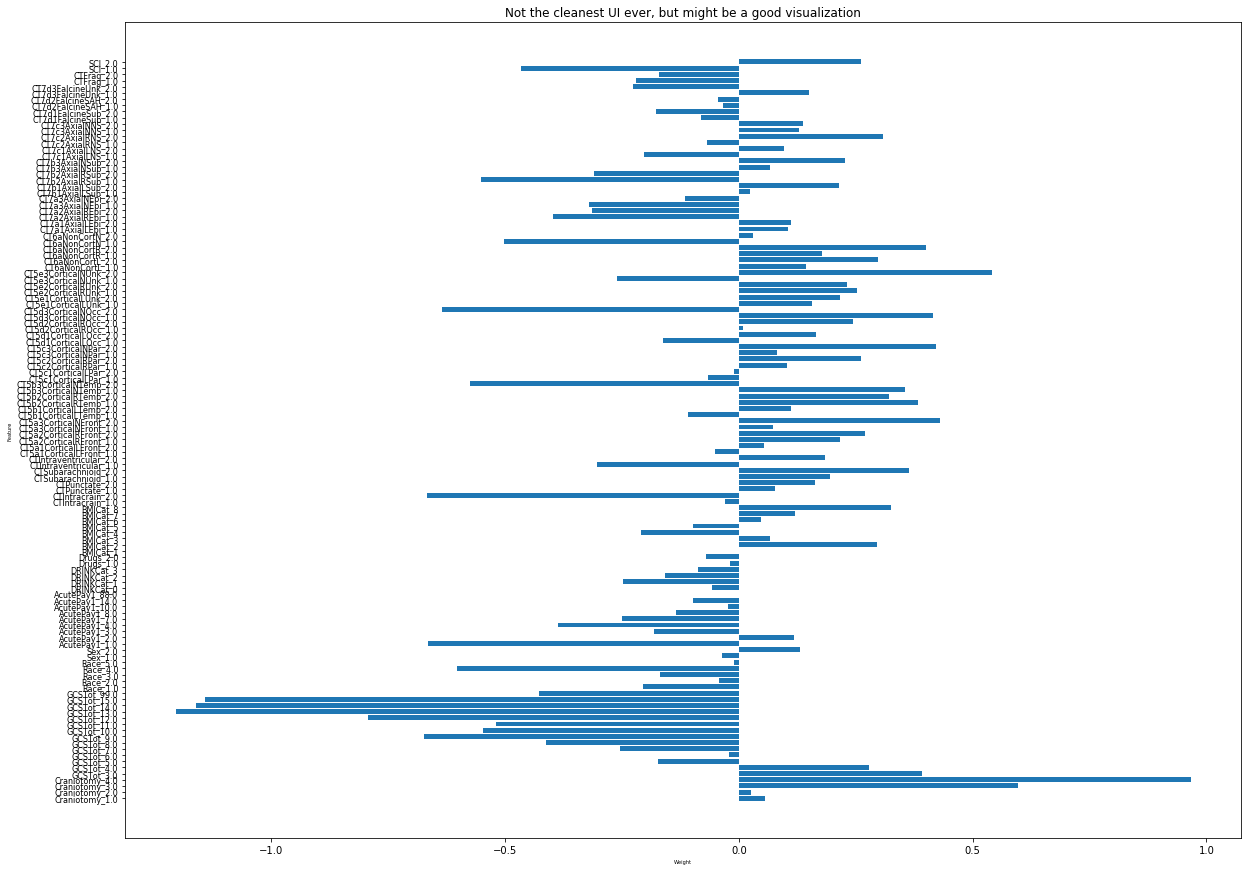

In [164]:
plot_bar_x()

In [167]:
import eli5
eli5.show_weights(days_model, feature_names=list(x), top=(1000,100))


Weight?,Feature
+0.966,Craniotomy_4.0
+0.597,Craniotomy_3.0
+0.541,CT5e3CorticalNUnk_2.0
+0.431,CT5a3CorticalNFront_2.0
+0.423,CT5c3CorticalNPar_2.0
+0.415,CT5d3CorticalNOcc_1.0
+0.401,CT6aNonCortR_2.0
+0.393,GCSTot_3.0
+0.383,CT5b2CorticalRTemp_1.0
+0.364,CTSubarachnioid_2.0


In [196]:
import csv
csv_columns = ['Feature','Weight']

dict_data = {}
for i in range(len(list(x))):
    dict_data[list(x)[i]] = coef[i]

print(dict_data)
with open('weights.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(csv_columns)
    for key, value in dict_data.items():
       writer.writerow([key, value])

{'Craniotomy_1.0': 0.05707237025275878, 'Craniotomy_2.0': 0.025562922591699566, 'Craniotomy_3.0': 0.5974525635328707, 'Craniotomy_4.0': 0.9661460568578834, 'GCSTot_3.0': 0.39266928295865006, 'GCSTot_4.0': 0.27852902176659733, 'GCSTot_5.0': -0.17275470472395296, 'GCSTot_6.0': -0.021613551022711515, 'GCSTot_7.0': -0.2531464047018065, 'GCSTot_8.0': -0.41179298001464776, 'GCSTot_9.0': -0.6723888581850282, 'GCSTot_10.0': -0.5463455138230069, 'GCSTot_11.0': -0.5193644488677314, 'GCSTot_12.0': -0.792360456904029, 'GCSTot_13.0': -1.2035356248874491, 'GCSTot_14.0': -1.1616919401382246, 'GCSTot_15.0': -1.1415553651400079, 'GCSTot_99.0': -0.42747488416688995, 'Race_1.0': -0.20566087359866217, 'Race_2.0': -0.04141682868774864, 'Race_3.0': -0.1676354794863166, 'Race_4.0': -0.6031543633720392, 'Race_5.0': -0.009241904475389529, 'Sex_1.0': -0.03561665962071782, 'Sex_2.0': 0.1317863410895424, 'AcutePay1_1.0': -0.6653417333309022, 'AcutePay1_2.0': 0.11882861459764216, 'AcutePay1_3.0': -0.18178836962665